In [ ]:
# pip install -e PyIRT_SDT/. --force-reinstall
!pip install PyIRT_SDT

  skill_id   item_id participant_id  response
0  Skill_0  Item_0_0      Student_0  0.958464
1  Skill_0  Item_0_0      Student_1  0.981465
2  Skill_0  Item_0_0      Student_2  0.499117
3  Skill_0  Item_0_0      Student_3  0.937814
4  Skill_0  Item_0_0      Student_4  0.098371
Iteration #0


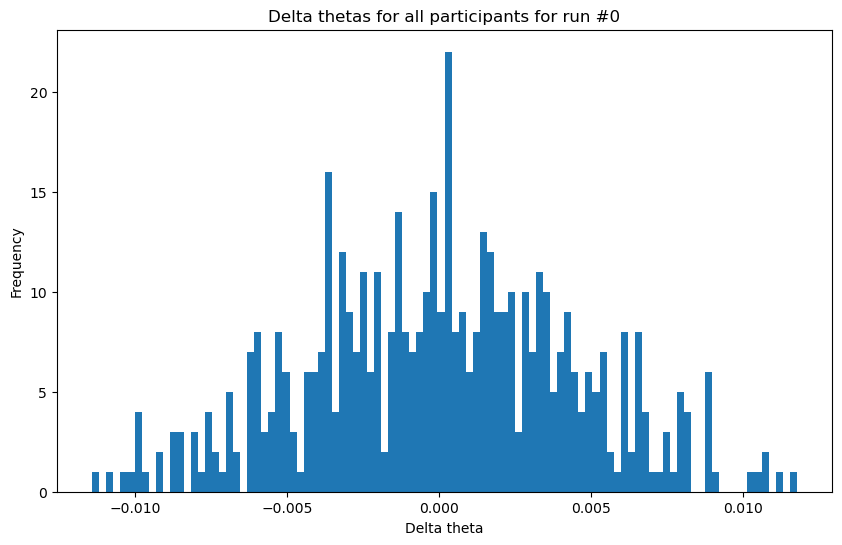

Iteration #10


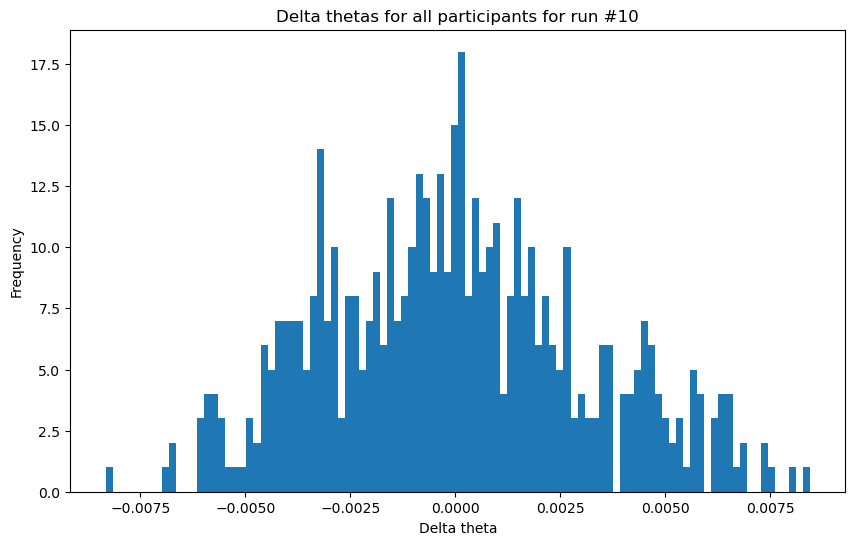

Iteration #20


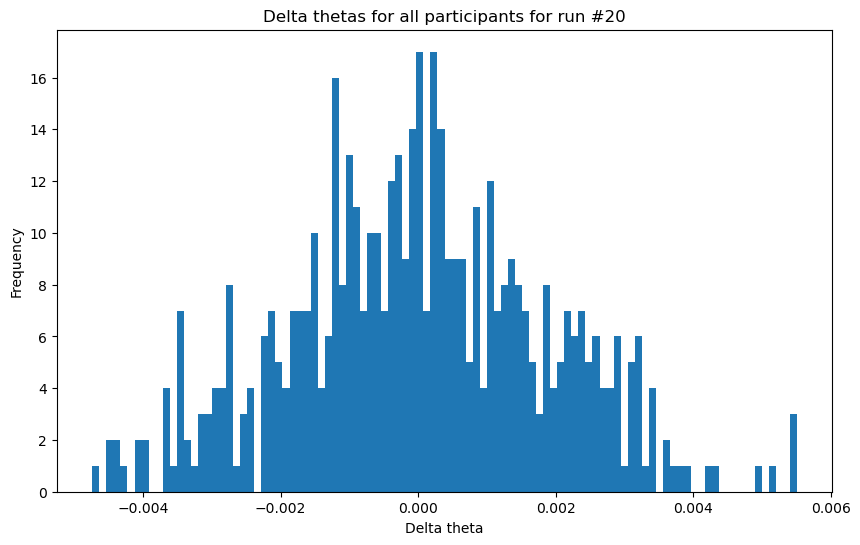

In [1]:
import numpy as np
import pandas as pd
import PyIRT_SDT as pyirt_sdt
import matplotlib.pyplot as plt

def generate_random_data(num_skills, num_students, num_items_per_skill, sparsity, continuous=False):
    """
    Generate random data for PyIRT_SDT.

    Args:
        num_skills (int): Number of skills to generate.
        num_students (int): Number of students.
        num_items_per_skill (int): Number of items per skill.
        sparsity (float): Proportion of missing data (0 to 1).
        continuous (bool): If True, generate continuous data (0 to 1). If False, generate binary data (0 or 1).

    Returns:
        pd.DataFrame: DataFrame in the format required by PyIRT_SDT.
    """
    data = []
    for skill in range(num_skills):
        for item in range(num_items_per_skill):
            for student in range(num_students):
                if np.random.random() > sparsity:
                    if continuous:
                        response = np.random.random()
                    else:
                        response = np.random.choice([0, 1])
                    data.append({
                        'skill_id': f'Skill_{skill}',
                        'item_id': f'Item_{skill}_{item}',
                        'participant_id': f'Student_{student}',
                        'response': response
                    })
    
    return pd.DataFrame(data)

# Generate random data
num_skills = 1
num_students = 500
num_items_per_skill = 20
sparsity = 0.2
continuous = True

random_data = generate_random_data(num_skills, num_students, num_items_per_skill, sparsity, continuous)
# Print the first few rows of the generated data
print(random_data.head())


# Process each skill
all_results = {}
for skill in random_data['skill_id'].unique():
    skill_data = random_data[random_data['skill_id'] == skill]
    
    # Prepare the data for PyIRT_SDT --- set roundValues to True for discretization of performance data
    table = pyirt_sdt.returnTable(skill_data, roundValues=False)
    
    # Run PyIRT_SDT -- set parallel to True to utilize all CPUs for potentially faster calculation
    # normally, I set iterations 250 -> 500
    results = pyirt_sdt.solve_IRT_for_matrix(table, FOUR_PL=True, iterations=30, parallel=False, verbose=False)





Results for Skill_0:


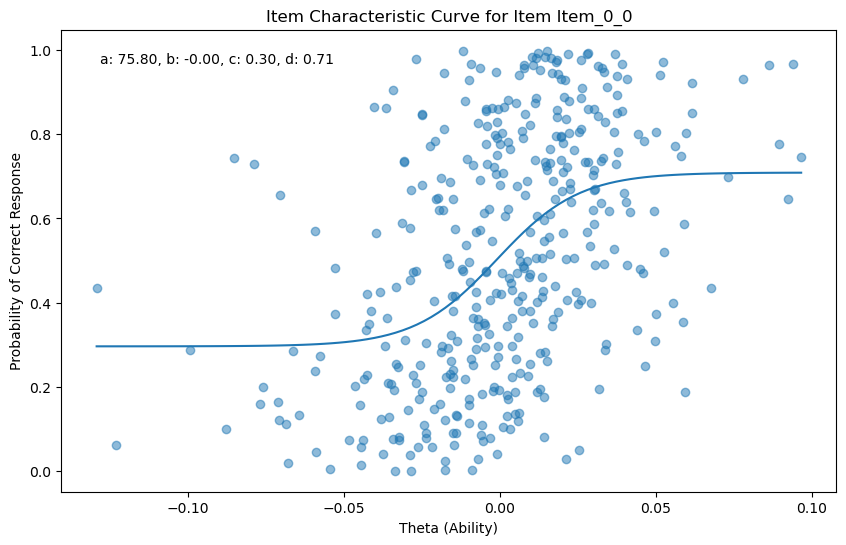

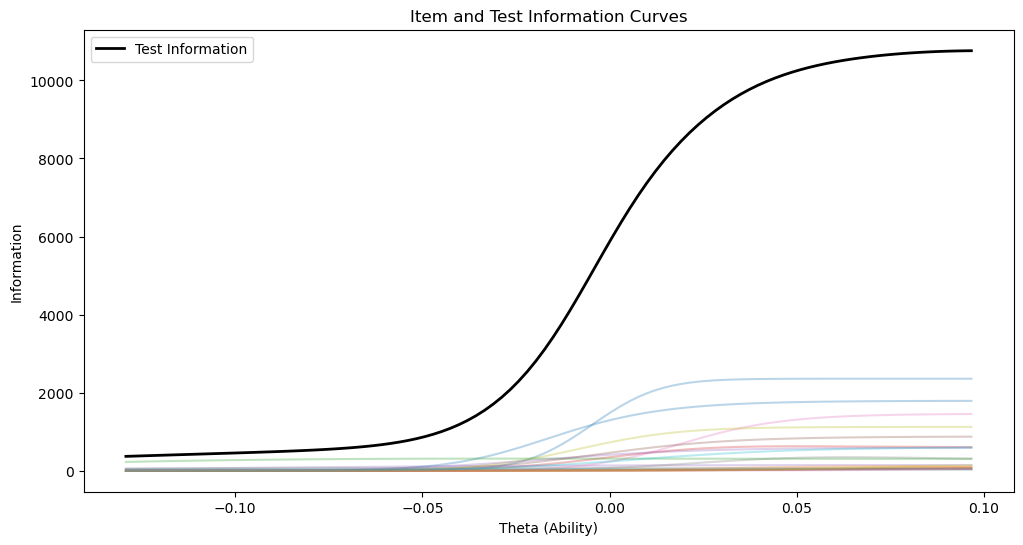

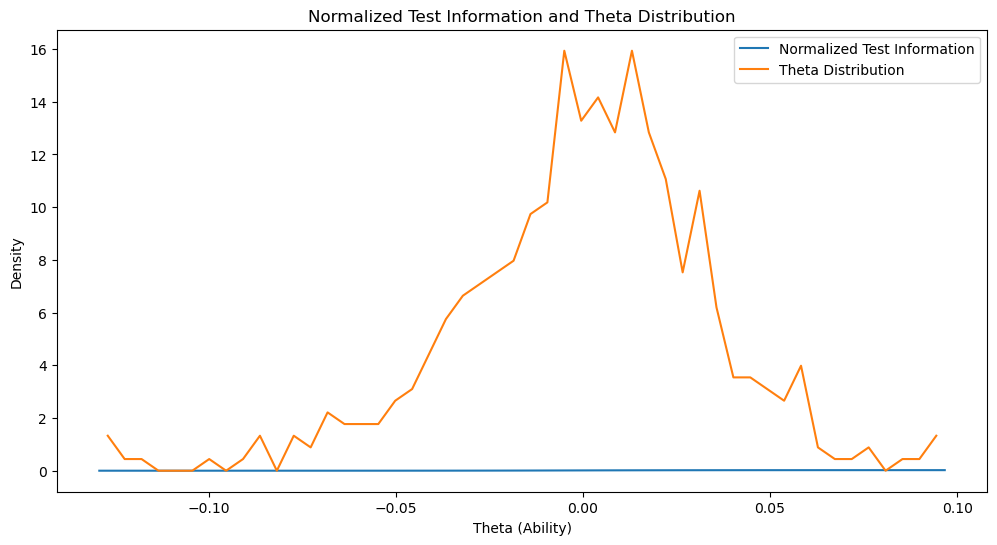

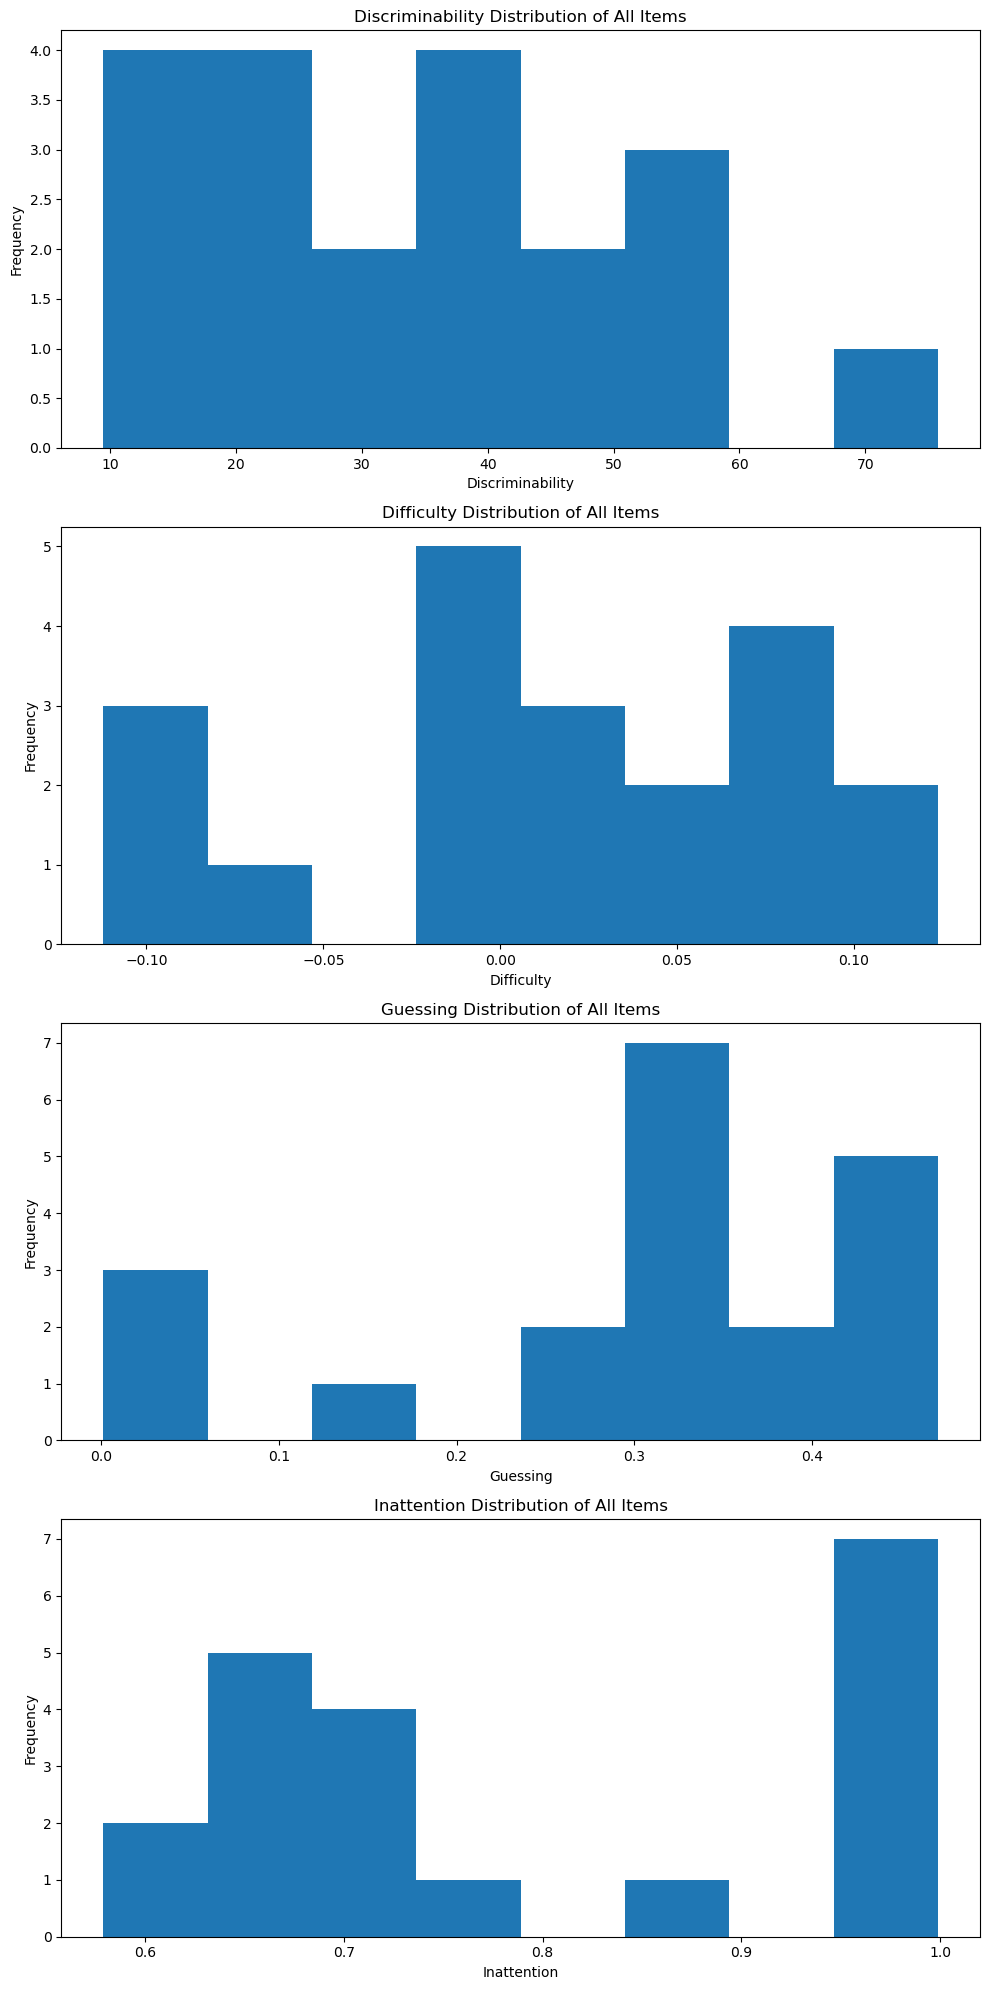

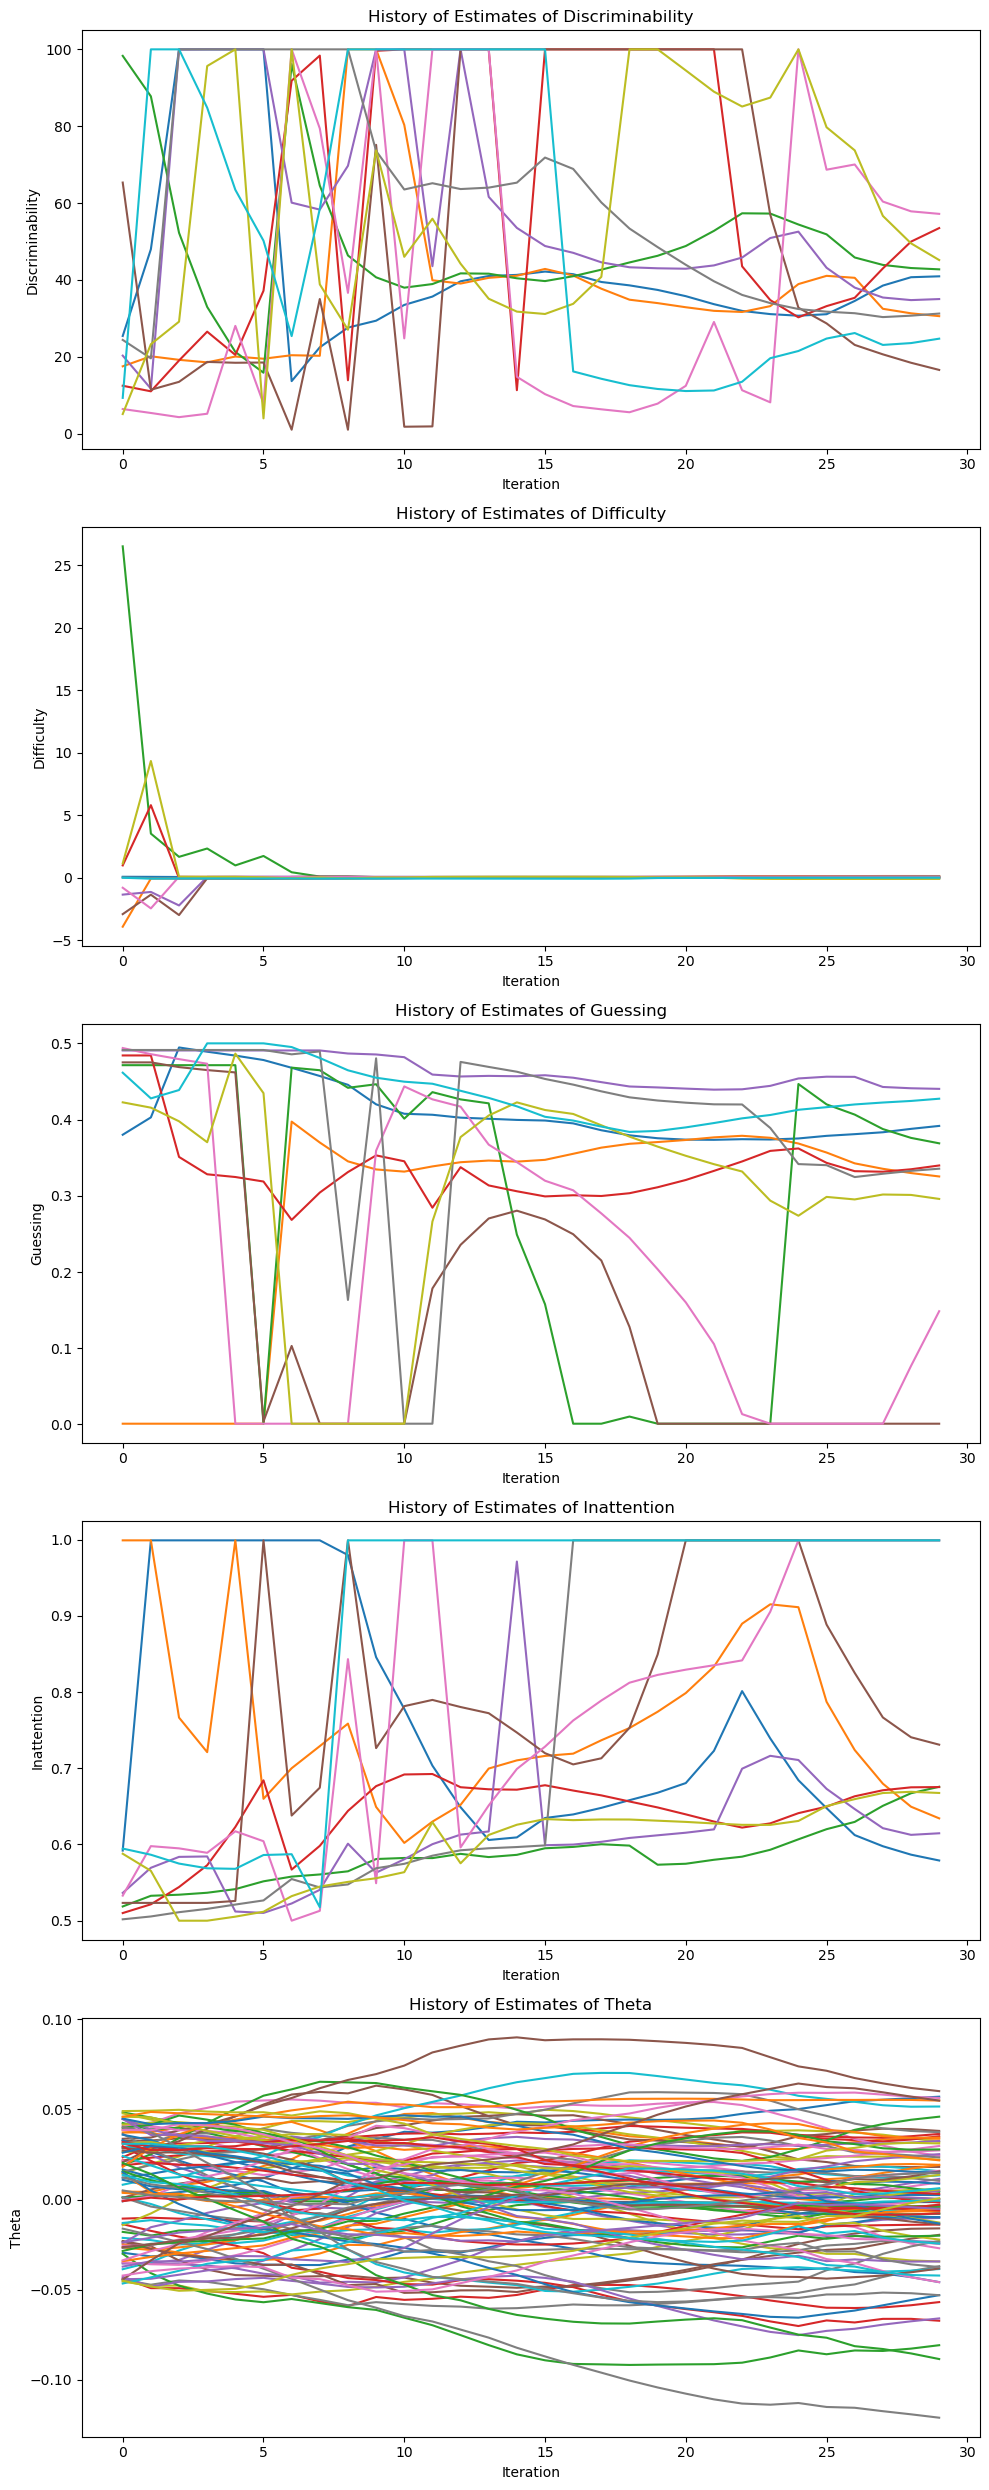

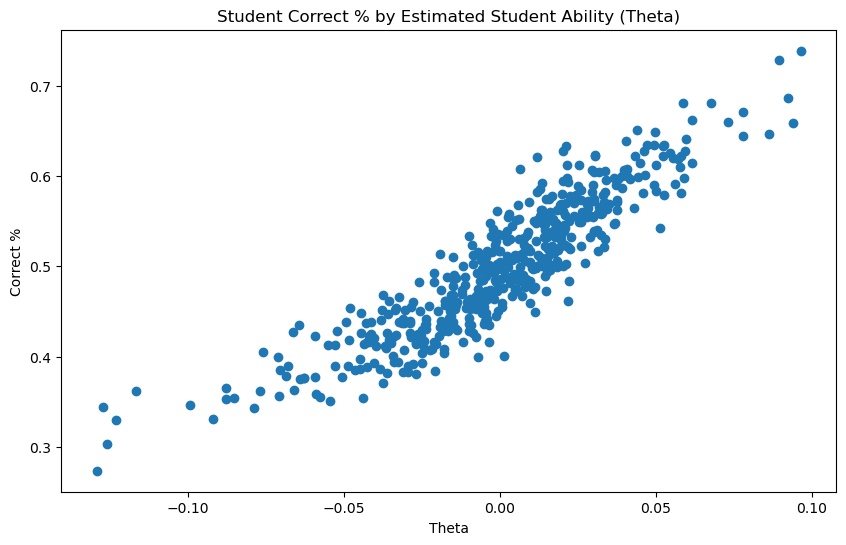

Correlation: 0.9029045898309573


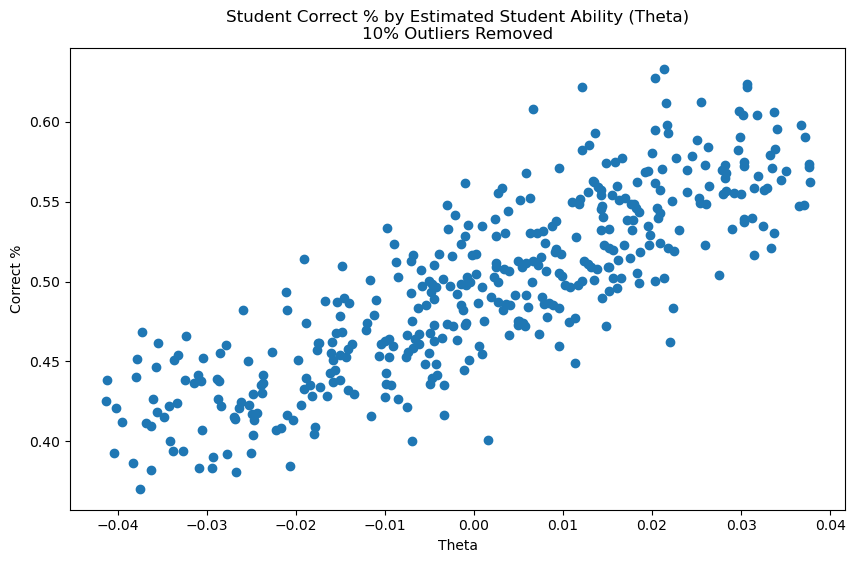

Correlation: 0.83408663463122


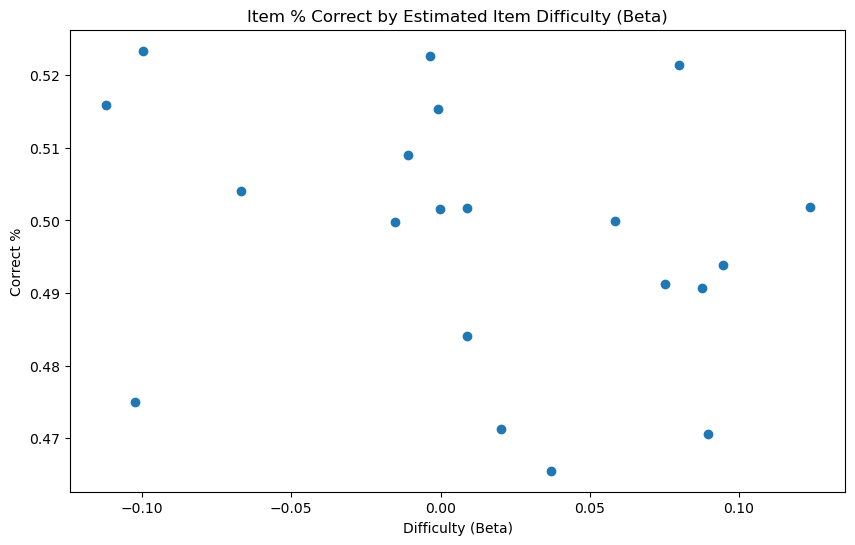

Correlation: -0.26500763557067786


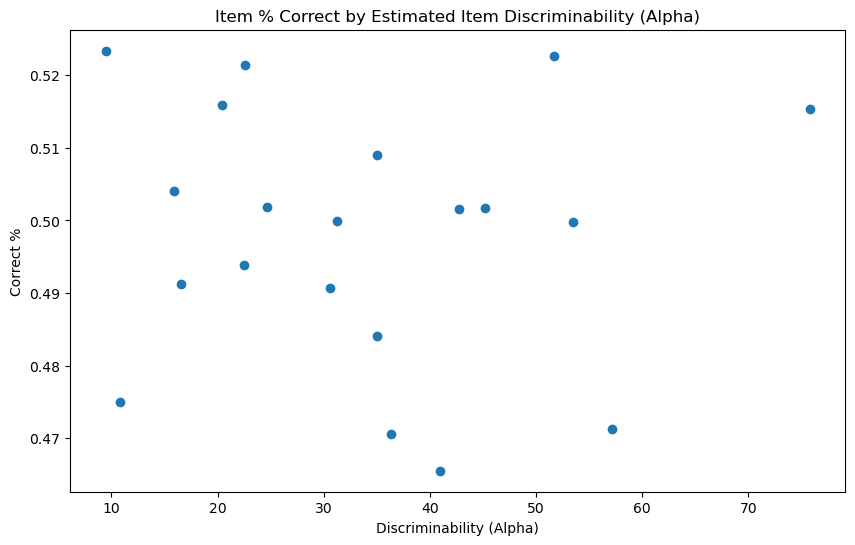

Correlation: -0.03461019251407893


In [11]:
# Visualization examples
print(f"\nResults for {skill}:")

#this one is item specific
item=0
item_params = [results.est_params[:-1][i][item] for i in range(4)]
# Plot Item Characteristic Curve for the first item
pyirt_sdt.plot_item_with_model(pyirt_sdt.four_param_logistic, results.thetas, 0, table, item_params)

# Plot information curves
pyirt_sdt.plot_information_curves(pyirt_sdt.four_param_logistic, table, results.thetas, results.est_params[:-1])

# Plot distributions of estimated item parameters
pyirt_sdt.distributionsOfEstimatedItemParameters(results)

# Plot sample parameter convergence
pyirt_sdt.plot_sample_parameter_convergence(results)

# Plot correlation of parameters by performance
pyirt_sdt.correlationOfParametersByPerformance(results)


Iteration #0


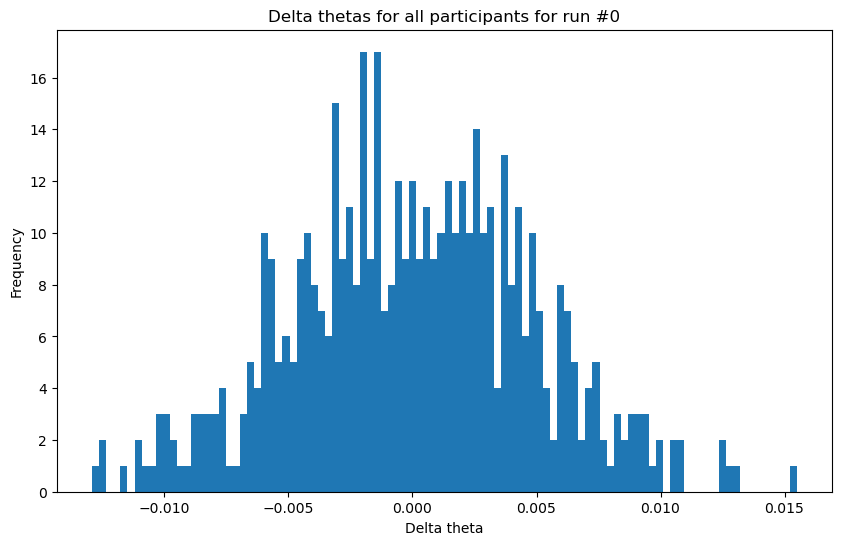

Iteration #10


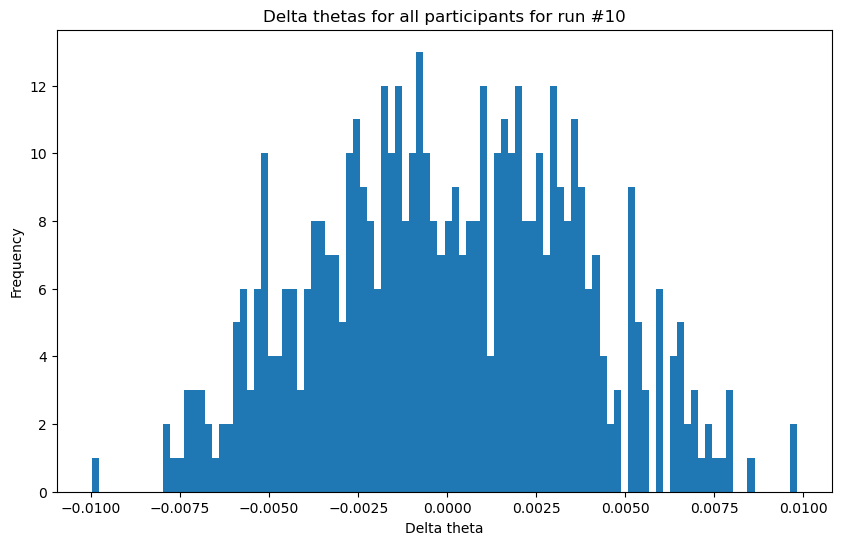

Iteration #20


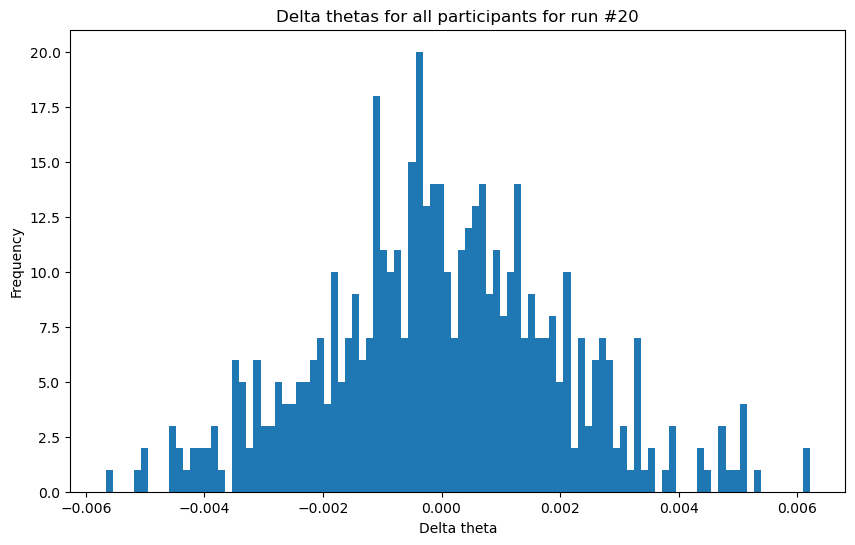

IRTResults for 20 items and 500 participants

In [13]:
#retest with parallel
#set show_discriminability = 10, show_convergence = 10, to see these plotted every 10 cycles during solutioning
results = pyirt_sdt.solve_IRT_for_matrix(table, FOUR_PL=True, iterations=30, parallel=True,
                               show_discriminability = None, show_convergence = 10,
                               verbose=False, PLOT_ON=False)


In [7]:
#first four parameters of 4PL model for all 20 items; 5 array is error covariance matrix from fitting procedure
results.est_params[:-1]

(array([75.79785881, 30.55623682, 16.55993079, 45.15934984, 15.87014266,
        22.5540574 , 57.18040143, 40.92393825, 51.69882434,  9.43782039,
        53.47805458, 31.23141132, 20.40925746, 22.46204775, 35.04840925,
        42.74075031, 24.69336917, 10.82952117, 36.32727513, 35.00512001]),
 array([-0.00088334,  0.08760012,  0.07529633,  0.00873246, -0.06692625,
         0.08001254,  0.02027492,  0.03701012, -0.00350851, -0.09969882,
        -0.01519367,  0.05859923, -0.11225193,  0.09462644, -0.01088865,
        -0.00026757,  0.12381881, -0.1023413 ,  0.08971244,  0.00901002]),
 array([0.29590211, 0.44028744, 0.33554923, 0.29868039, 0.14857449,
        0.42736277, 0.36884559, 0.33676428, 0.30508837, 0.00100002,
        0.28995446, 0.39167648, 0.001     , 0.4214615 , 0.27997265,
        0.32537011, 0.47112087, 0.001     , 0.43607797, 0.33977832]),
 array([0.70907486, 0.999     , 0.999     , 0.77282002, 0.63427922,
        0.999     , 0.69089678, 0.86260829, 0.70407677, 0.73093156,
  